In [1]:
import ugradio
import numpy as np
import matplotlib.pyplot as plt
import glob
import lab2

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [120]:
reload(lab2)

<module 'lab2' from 'lab2.py'>

In [121]:
from lab2 import make_complex, avg_power, transform_2D_3D, avg_3d_power, power, frequencies, avg_power_plot, avg_3d_power_plot

## No Test, Test Signals

In [3]:
d1419 = 0.1*np.genfromtxt('1419_data/1419_990Blocks.txt')/(2.**15)

In [4]:
d1419_comp = make_complex(d1419, 990)

Sampling at a frequency 62.5
Sampling with 8192 number of samples


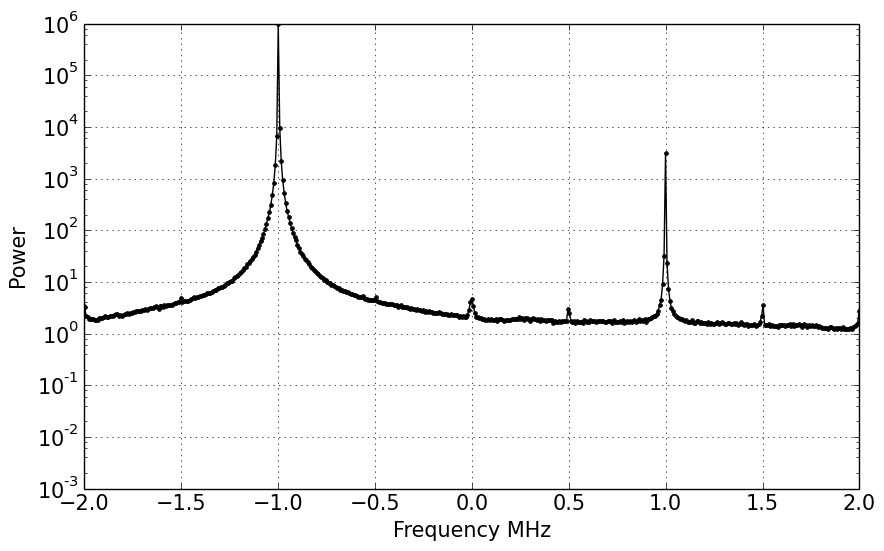

In [20]:
plt.figure(figsize = (10,6))
avg_power(d1419_comp, 1, 2**13, 'k', 'LSB Test Signal')
plt.xlim(-2,2)
plt.semilogy()
# plt.grid()
plt.savefig('1419_test_log')

In [3]:
blackB = 0.1*np.genfromtxt('BlackBody/Blocks200_BB.txt')/(2.**15)

In [4]:
coldS = 0.1*np.genfromtxt('ColdSky/Blocks200_CS.txt')/(2.**15)

In [137]:
blackB_comp = make_complex(blackB, 200)
coldS_comp = make_complex(coldS, 200)

In [148]:
freq_cs, s_coldsky = avg_power(coldS_comp, 1,2**13)
freq_bb, s_300k = avg_power(blackB_comp,1,2**13)

(-3, 3)

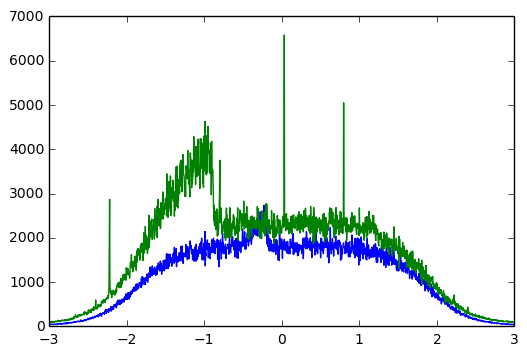

In [142]:
plt.plot(freq_cs, s_coldsky)
plt.plot(freq_bb, s_300k)
plt.xlim(-3,3)

(-3, 3)

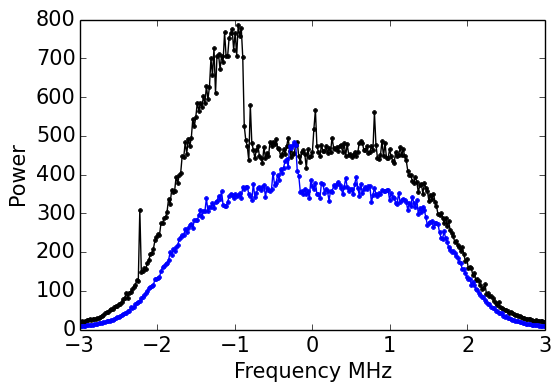

In [145]:
avg_3d_power_plot(blackB_comp, 200, 5, 16000, 16000, 'k', 'blackbody')
avg_3d_power_plot(coldS_comp, 200, 5, 16000, 16000, 'b', 'coldsky')
plt.xlim(-3,3)

In [151]:
def Tsys(cs, bb, Tcal):
    f1 = sum(cs)*float(Tcal)/sum(bb - cs)
    f2 = 1 + sum(cs)/sum(bb - cs)
    return f1/f2

In [153]:
tsys = Tsys(s_coldsky, s_300k, 300)
tsys

205.34141533150398

In [170]:
USB_calibrated = shape_USB * tsys
LSB_calibrated = shape_LSB * tsys

In [169]:
len(shape_USB*tsys)

8000

In [171]:
len(USB_calibrated)

8000

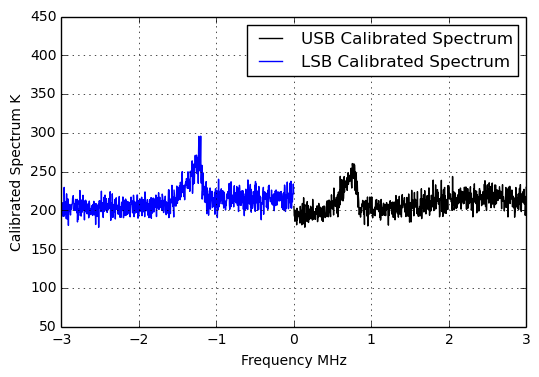

In [177]:
plt.plot(freq1231[int(len(freq1231)/2):], USB_calibrated,'k', label = 'USB Calibrated Spectrum')
plt.plot(freq1231[:int(len(freq1231)/2)], LSB_calibrated,'b', label = 'LSB Calibrated Spectrum')
plt.xlim(-3,3)
plt.legend()
plt.grid()
plt.xlabel('Frequency MHz')
plt.ylabel('Calibrated Spectrum K')
plt.savefig('calibrated')

In [185]:
v[int(len(freq1231)/2):]

array([-299915.51675584, -299916.34178752, -299917.16681921, ...,
       -306513.29511053, -306514.12014221, -306514.94517389])

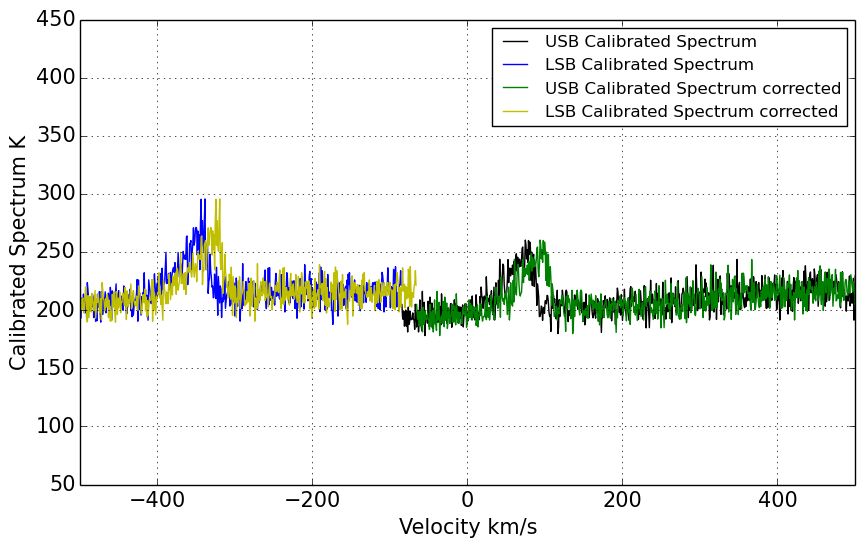

In [211]:
df = .4-freq1231

v = -(3.*10**5)*df/1420.4
vc = v - vd
plt.figure(figsize = (10,6))
plt.plot(v[int(len(freq1231)/2):], USB_calibrated,'k', label = 'USB Calibrated Spectrum')
plt.plot(v[:int(len(freq1231)/2)], LSB_calibrated,'b', label = 'LSB Calibrated Spectrum')
plt.plot(vc[int(len(freq1231)/2):], USB_calibrated,'g', label = 'USB Calibrated Spectrum corrected')
plt.plot(vc[:int(len(freq1231)/2)], LSB_calibrated,'y', label = 'LSB Calibrated Spectrum corrected')
plt.xlim(-500,500)
plt.legend()
plt.grid()
plt.xlabel('Velocity km/s', fontsize = 15)
plt.ylabel('Calibrated Spectrum K', fontsize = 15)
plt.tick_params(labelsize = 15)
plt.savefig('calibrated')

In [670]:
ugradio.doppler.get_projected_velocity?

In [191]:
ugradio.doppler.get_projected_velocity(1.1503179297488677,37.873199, 2458168.60879)

array([-19062.17537332])

In [205]:
vd = -19062.17537332/1000
vd

-19.06217537332

In [ ]:
ugradio.doppler.

In [201]:
ugradio.timing.lst(2458168.60879)

1.1503179297488677

In [202]:
ugradio.doppler.get_projected_velocity?

In [6]:
lsb1229 = 0.1*np.genfromtxt('1229_LSB/1229_Blocks1000.txt')

In [7]:
lsb1229 = lsb1229/(2.**15)

In [8]:
usb1231 = 0.1*np.genfromtxt('1231_USB/1231_Blocks1000.txt')/(2.**15)

In [67]:
lsb1229_comp = make_complex(lsb1229, 1000)

In [68]:
usb1231_comp = make_complex(usb1231, 1000)

In [164]:
freq1231, pwr_1231 = avg_power(usb1231_comp, 1, 16000)
freq1229, pwr_1229 = avg_power(lsb1229_comp, 1, 16000)

# freq1231, pwr_1231 = avg_3d_power(usb1231_comp, 1000, 5, 16000, 16000)
# freq1229, pwr_1229 = avg_3d_power(lsb1229_comp, 1000,5, 16000, 16000)

In [165]:
s_online_1231 = pwr_1231[int(len(freq1231)/2):]
s_offline_1229 = pwr_1229[int(len(freq1231)/2):]
s_online_1229 = pwr_1229[:int(len(freq1231)/2)]
s_offline_1231 = pwr_1231[:int(len(freq1231)/2)]

shape_USB = s_online_1231/s_offline_1229
shape_LSB = s_online_1229/s_offline_1231



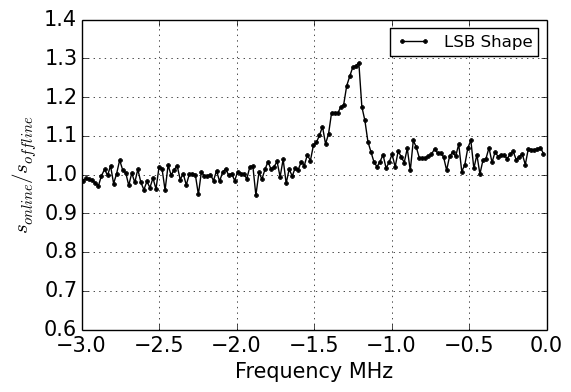

In [135]:
plt.plot(freq1229[:int(len(freq1231)/2)], shape_LSB, 'k.-', label = 'LSB Shape')
plt.xlabel('Frequency MHz', fontsize = 15)
plt.ylabel('$s_{online}/s_{offline}$', fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xlim(-3,0)
plt.grid()
plt.legend()
plt.savefig('shape_lsb_smooth')

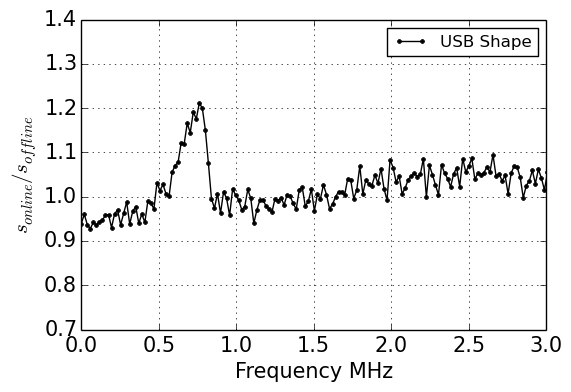

In [136]:
plt.plot(freq1229[int(len(freq1231)/2):],shape_USB,'k.-', label = 'USB Shape' )
plt.xlabel('Frequency MHz', fontsize = 15)
plt.ylabel('$s_{online}/s_{offline}$', fontsize = 15)
plt.tick_params(labelsize = 15)
plt.xlim(0,3)
plt.grid()
plt.legend()
plt.savefig('shape_usb_smooth')

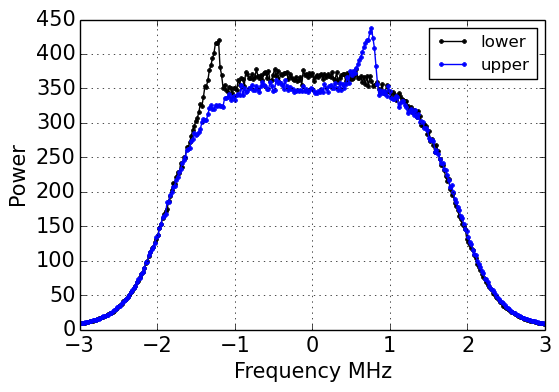

In [128]:
plt.plot(figsize = (10,6))
avg_3d_power_plot(lsb1229_comp, 1000,5,16000,2**13,'k', 'lower')
avg_3d_power_plot(usb1231_comp,1000,5,16000,2**13, 'b', 'upper')
# plt.xlim(-3,3)
plt.grid()
plt.xlim(-3,3)
plt.legend()
plt.savefig('USB_LSB_smooth')

Sampling at a frequency 62.5
Sampling with 16000 number of samples
Sampling at a frequency 62.5
Sampling with 16000 number of samples


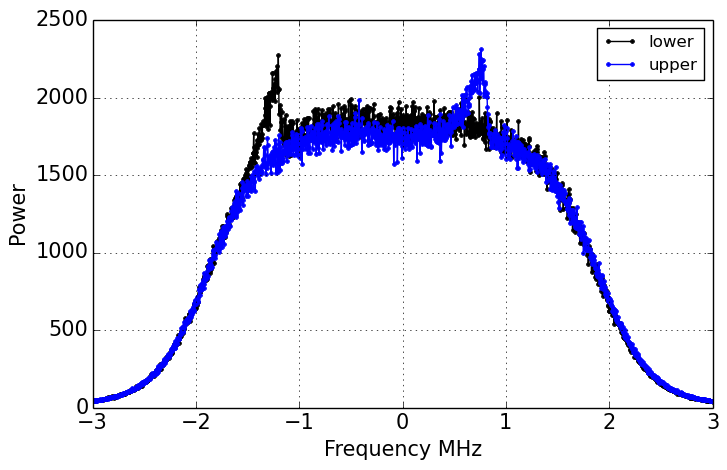

In [218]:
plt.figure(figsize = (8,5))
avg_power_plot(lsb1229_comp, 1, 16000, 'k', 'lower')
avg_power_plot(usb1231_comp, 1, 16000, 'b', 'upper')
plt.xlim(-3,3)
plt.grid()
plt.legend()
plt.savefig('USB_LSB')

In [219]:
gal1229 = 0.1*np.genfromtxt('galactic_data_1229/galactic_Blocks1000_1229.txt')/(2.**15)
gal1232 = 0.1*np.genfromtxt('galactic_data_1231/galactic_Blocks1000_1231.txt')/(2.**15)

In [220]:
gal1229_comp = make_complex(gal1229, 1000)
gal1231_comp = make_complex(gal1232, 1000)

In [615]:
freq1, power1 = avg_power(gal1229_comp, 1, 16000)
freq2, power2 = avg_power(gal1231_comp, 1, 16000)

# freq1, power1 = avg_3d_power(gal1229_comp, 1000, 10, 16000, 16000)
# freq2, power2 = avg_3d_power(gal1231_comp, 1000, 10, 16000, 16000)

In [651]:
usbon = power2[int(len(power2)/2)-40:]
usbof = power2[:int(len(power2)/2)+25]
lsbon = power1[:int(len(power2)/2)+25]
lsbof = power1[int(len(power2)/2)-40:]

In [652]:
galshapeusb = usbon/lsbof * tsys
galshapelsb = lsbon/usbof * tsys



In [654]:
len(x)
np.argwhere(x==0)
x1 = x

In [639]:
y3 = ugradio.gauss.gaussval(x2, args['amp'][1], args['avg'][1], args['sig'][1])
y4 = ugradio.gauss.gaussval(x2, args['amp'][0], args['avg'][0], args['sig'][0])

In [592]:
y = ugradio.gauss.gaussval

In [593]:
ugradio.gauss.gaussfit?

In [594]:
{'amp': array([ 206.29875009,   50.26061864]),
 'avg': array([ 3.05430057,  0.45082371]),
 'sig': array([ 12.46393206,  -0.0678927 ])}

{'amp': array([ 206.29875009,   50.26061864]),
 'avg': array([ 3.05430057,  0.45082371]),
 'sig': array([ 12.46393206,  -0.0678927 ])}

In [659]:
args= ugradio.gauss.gaussfit(x1, usb, [5,50], [0.3,0.2], [0.01, 0.03])
args

ValueError: operands could not be broadcast together with shapes (8040,) (8025,) 

In [660]:
usb = galshapeusb

In [661]:
pars = np.polyfit(x, usb,3)
pars

array([ -1.15535461e-02,   6.55705605e-01,  -9.81089068e+00,
         2.22870886e+02])

In [662]:
pars1 = np.polyfit(x, usb,1)
pars1

array([   0.48995784,  187.40302736])

In [663]:
pars2 = np.polyfit(x,usb,2)
pars2

array([  1.16908692e-01,  -3.14471513e+00,   2.06043949e+02])

In [664]:
x = freq1[int(len(power2)/2)-40:]
x2 = freq1[int(len(power2)/2)-40:]
x2 = x2[:200]
ys = pars1[0]*x + pars1[1]

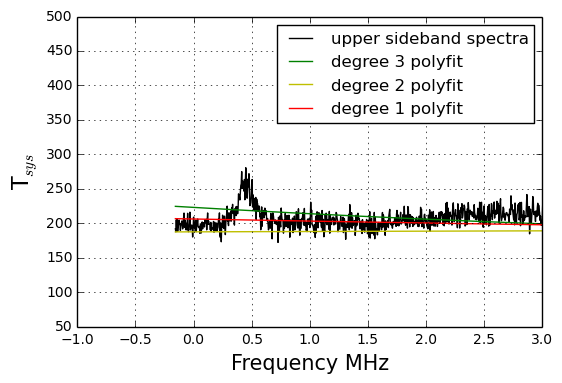

In [669]:
plt.plot(x1, usb, 'k',label= 'upper sideband spectra')
# plt.plot(freq2[:int(len(power2)/2)+25], galshapelsb)
plt.plot(x1, pars[0]*x1**3 + pars[1]*x1**2 + pars[2]*x1 + pars[3], 'g', label = 'degree 3 polyfit')
plt.plot(x1, pars1[0]*x1 + pars1[1], 'y', label = 'degree 2 polyfit')
plt.plot(x1, pars2[0]*x1**2 + pars2[1]*x1 + pars2[2], 'r', label = 'degree 1 polyfit')
# plt.plot(x1, y1)
# plt.plot(x1,y2, label = 'gaussian fit')
plt.xlim(-1,3)
# plt.ylim(100,300)
plt.legend(loc = 'upper right')
plt.xlabel('Frequency MHz', fontsize = 15)
plt.ylabel('T$_{sys}$', fontsize = 16)
plt.grid()
plt.savefig('notaverage')

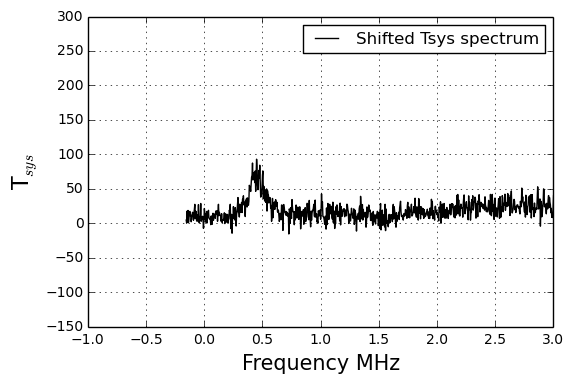

In [668]:
plt.plot(x1, usb-s2, 'k',label= 'Shifted Tsys spectrum', )
# plt.plot(freq2[:int(len(power2)/2)+25], galshapelsb)
# plt.plot(x1, pars[0]*x1**3 + pars[1]*x1**2 + pars[2]*x1 + pars[3], 'g', label = 'degree 3 polyfit')
# plt.plot(x1, pars1[0]*x1 + pars1[1], 'y', label = 'degree 2 polyfit')
# plt.plot(x1, pars2[0]*x1**2 + pars2[1]*x1 + pars2[2], 'r', label = 'degree 1 polyfit')
# plt.plot(x2, y1,'--', label = 'Gaussian Fit', linewidth = 2)
# plt.plot(x1, y3,'--', label = 'Gaussian Fit', linewidth = 2)
# plt.plot(x1,y2, )
plt.xlim(-1,3)
# plt.ylim(100,300)
plt.legend(loc = 'upper right')
plt.xlabel('Frequency MHz', fontsize = 15)
plt.ylabel('T$_{sys}$', fontsize = 16)
plt.grid()


In [667]:
s1 = pars[0]*x1**3 + pars[1]*x1**2 + pars[2]*x1 + pars[3]
s2 = pars1[0]*x1 + pars1[1]
s3 = pars2[0]*x1**2 + pars2[1]*x1 + pars2[2]

Sampling at a frequency 62.5
Sampling with 8192 number of samples
Sampling at a frequency 62.5
Sampling with 8192 number of samples


(-3, 3)

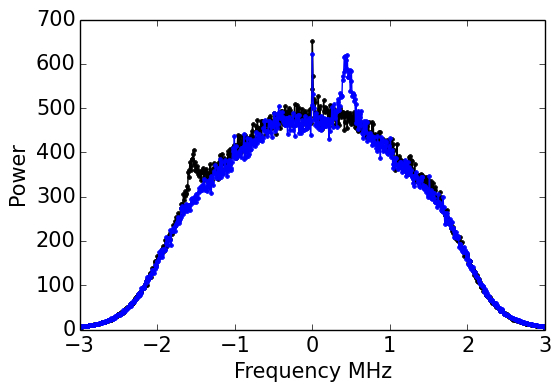

In [222]:
avg_power_plot(gal1229_comp, 1, 2**13, 'k', '1229')
avg_power_plot(gal1231_comp, 1, 2**13, 'b', '1229')
plt.xlim(-3,3)

In [ ]:
coldS_comp = make_complex(coldS, 200)

In [ ]:
plt.figure(figsize = (10,6))
avg_power(blackB_comp, 1, 2**13, 'b', 'Black Body')
avg_power(coldS_comp, 1, 2**13, 'k', 'Cold Sky')
plt.xlim(-3,3)
plt.legend(fontsize = 15)
plt.grid()
plt.savefig('BlackB_ColdS')

In [ ]:
avg_3d_power?

In [ ]:
coldS_3d = transform_2D_3D(coldS_comp, 200, 10, 16000)
blackB_3d = transform_2D_3D(blackB_comp, 200, 10, 16000)
plt.figure(figsize = (10,6))
avg_3d_power(coldS_3d, 200, 10, 16000, 2**13, 'b', 'Black Body')
avg_3d_power(blackB_3d, 200, 10, 16000, 2**13, 'k', 'Cold Sky')
plt.legend(fontsize=15)
plt.grid()

In [ ]:
# d1420 = 0.1*np.genfromtxt('1420_data/1420_990Blocks.txt')/(2.**15)

# d1420_comp = make_complex(d1420, 990)
plt.figure(figsize = (10,6))


lab2.avg_power(d1420_comp, 1, 2**12, 'k', 'averaged low')
plt.xlim(-3,3)
# plt.semilogy()
plt.savefig('1420_power')

In [ ]:
avg_3d_power?

In [ ]:
d1420_3d = transform_2D_3D(d1420_comp, 990, 20, 16000)
plt.figure(figsize = (10,6))
avg_3d_power(d1420_3d, 990, 20, 16000, 2**12, 'k', 'Averaged Horn Power' )
# plt.vlines(0.3, 0,1)
plt.savefig('avg_1420_power')

In [ ]:
# d1419 = np.genfromtxt('1419_data/1419_990Blocks.txt')

d1419_comp = make_complex(d1419, 990)
plt.figure(figsize = (10,6))


lab2.avg_power(d1419_comp, 1, 2**13, 'k', 'averaged low')
plt.xlim(-3,3)
# plt.semilogy()
# plt.savefig('1420_power')

In [ ]:
lsb1229 = np.genfromtxt('1229_LSB/1229_Blocks1000.txt')

In [ ]:
lsb1229_comp = make_complex(lsb1229, 1000)

In [ ]:
usb1231 = np.genfromtxt('1231_USB/1231_Blocks1000.txt')

In [ ]:
usb1231_comp = make_complex(usb1231, 1000)

In [ ]:
plt.figure(figsize = (10,6))
avg_power(lsb1229_comp, 1, 2**13, 'k', 'LSB')
avg_power(usb1231_comp, 1, 2**13, 'b', 'USB')
plt.grid()
plt.xlim(-3,3)
plt.legend(fontsize = 15)
plt.savefig('USB_LSB')

In [11]:
gal1230 = 0.1*np.genfromtxt('galactic_data/galactic_Blocks1000.txt')/(2.**15)

In [12]:
gal1230_comp = make_complex(gal1230, 1000)

In [ ]:
avg_power?

Sampling at a frequency 62.5
Sampling with 8192 number of samples


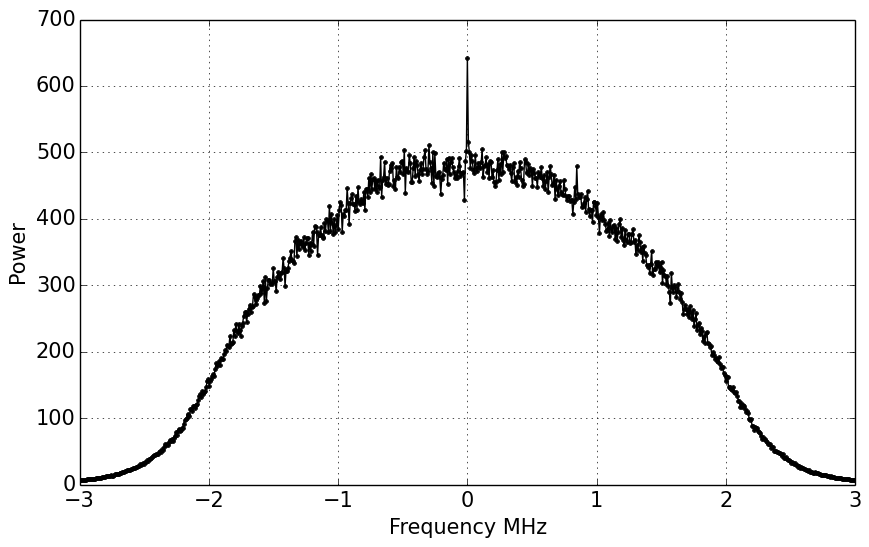

In [13]:
plt.figure(figsize = (10,6))
avg_power(gal1230_comp, 1, 2**13, 'k', 'Galactic Power')
plt.xlim(-3,3)
plt.savefig('galactic_1230')

In [ ]:
avg_3d_power?

In [18]:
gal1230.shape

(32000000,)

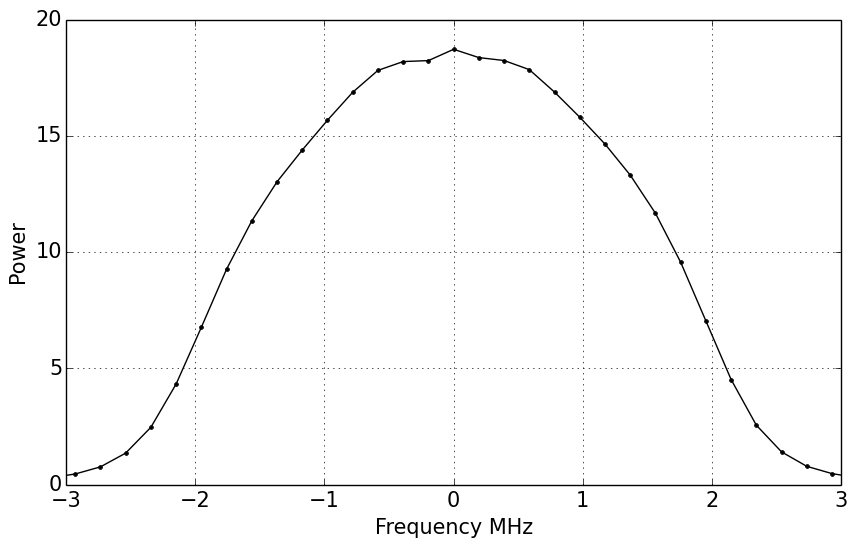

In [14]:
gal1230_3d = transform_2D_3D(gal1230_comp, 1000, 50, 16000)
plt.figure(figsize = (10,6))
avg_3d_power(gal1230_3d, 1000, 50, 16000, 2**13, 'k', 'Galactic Power')
plt.xlim(-3,3)
plt.savefig('galactic_1230_avg')

In [3]:
gal1229 = 0.1*np.genfromtxt('galactic_data_1229/galactic_Blocks1000_1229.txt')/(2.**15)

In [4]:
gal1229.shape

(32000000,)

In [5]:
gal1229_comp = make_complex(gal1229, 1000)

Sampling at a frequency 62.5
Sampling with 8192 number of samples


(-3, 3)

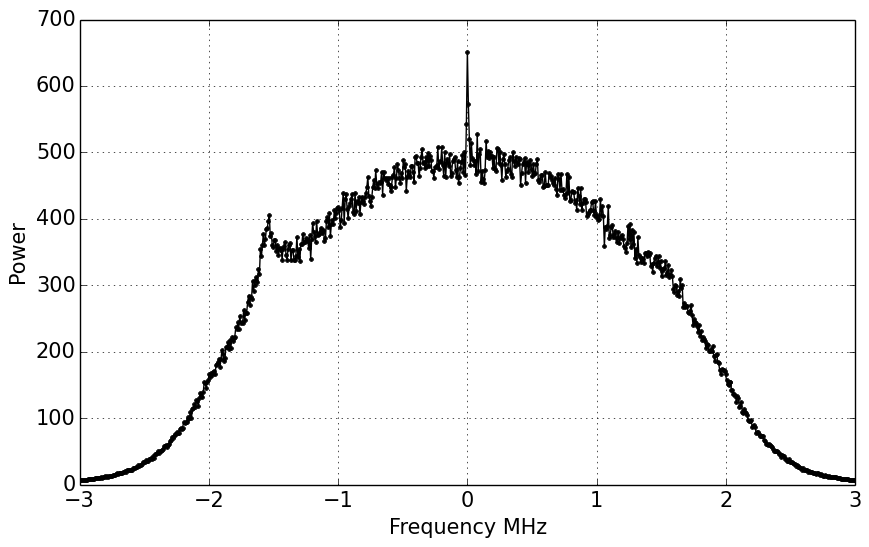

In [6]:
plt.figure(figsize = (10,6))
avg_power(gal1229_comp, 1, 2**13, 'k', 'Galactic Power 1229 LSB')
plt.xlim(-3,3)

In [7]:
gal1229_comp.shape

(1000, 16000)

(-3, 3)

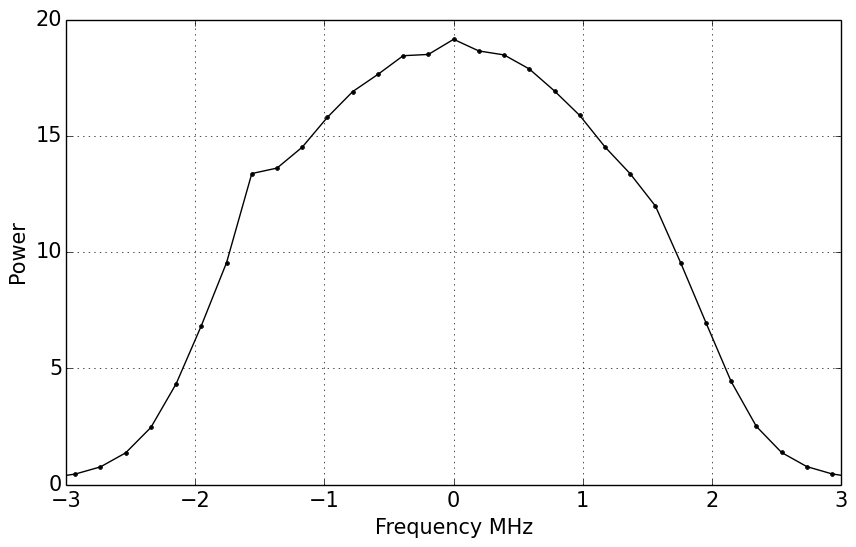

In [15]:
gal1229_3d = transform_2D_3D(gal1229_comp, 1000, 20, 16000)
plt.figure(figsize = (10,6))
avg_3d_power(gal1229_3d, 1000, 50, 16000, 2**13, 'k', 'Galactic Power')
# avg_3d_power(gal1230_3d, 1000, 50, 16000, 2**13, 'k', 'Galactic Power')

plt.xlim(-3,3)
# plt.savefig('galactic_1230_avg')

In [10]:
gal1231 = 0.1*np.genfromtxt('galactic_data_1231/galactic_Blocks1000_1231.txt')/(2.**15)

In [11]:
gal1231_comp = make_complex(gal1231, 1000)

Sampling at a frequency 62.5
Sampling with 8192 number of samples
Sampling at a frequency 62.5
Sampling with 8192 number of samples


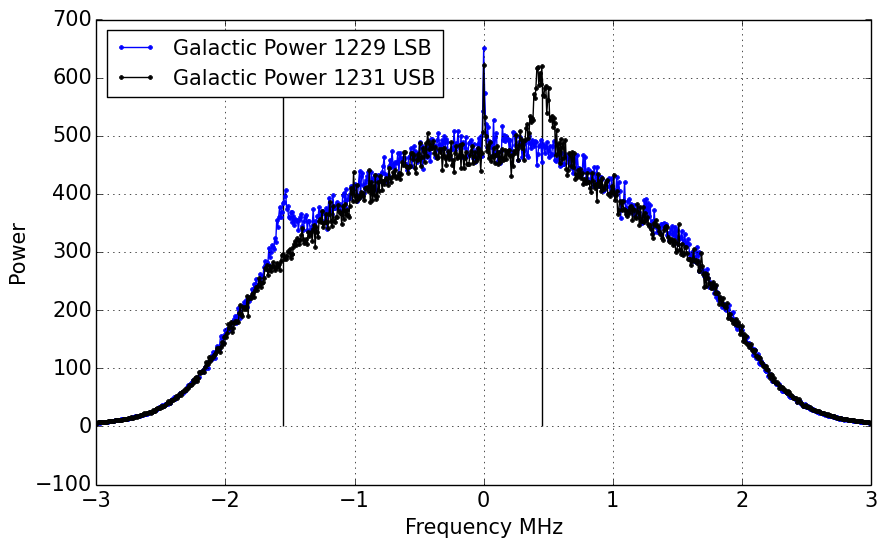

In [24]:
plt.figure(figsize = (10,6))
avg_power(gal1229_comp, 1, 2**13, 'b', 'Galactic Power 1229 LSB')
avg_power(gal1231_comp, 1, 2**13, 'k', 'Galactic Power 1231 USB')
plt.vlines(-1.55, 0, 600)
plt.vlines(.45, 0, 600)
plt.xlim(-3,3)
plt.grid()
plt.legend(loc = 'upper left', fontsize = 15)